# **Projeto - Paralização OpenMP**

*Supercomputação*

Luís Filipe Loureiro e Murilo Lima

### **Introdução & Análise**

Nessa etapa do projeto temos como objetivo escolher uma das estratégias de comparação de DNA e torná-lo paralelizado. Para tanto, foi utilizado a tecnologia de computação multi-core OpenMP.

Após uma análise do código dos três algoritmos e da confecção do Relatório Intermediário que comparou dado diferentes entradas; o grupo escolheu a **Estratégia Local** para realizar a paralização.

Isso se deve, pois tal estratégia apresenta três pontos específicos que são muito propícios para serem paralelizados por OpenMP:
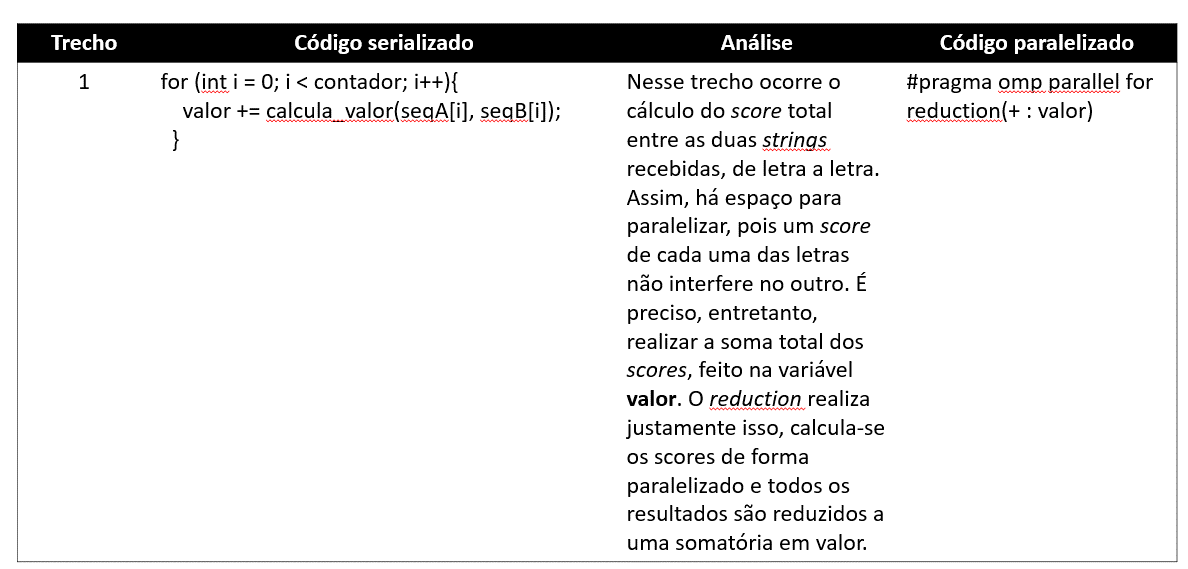

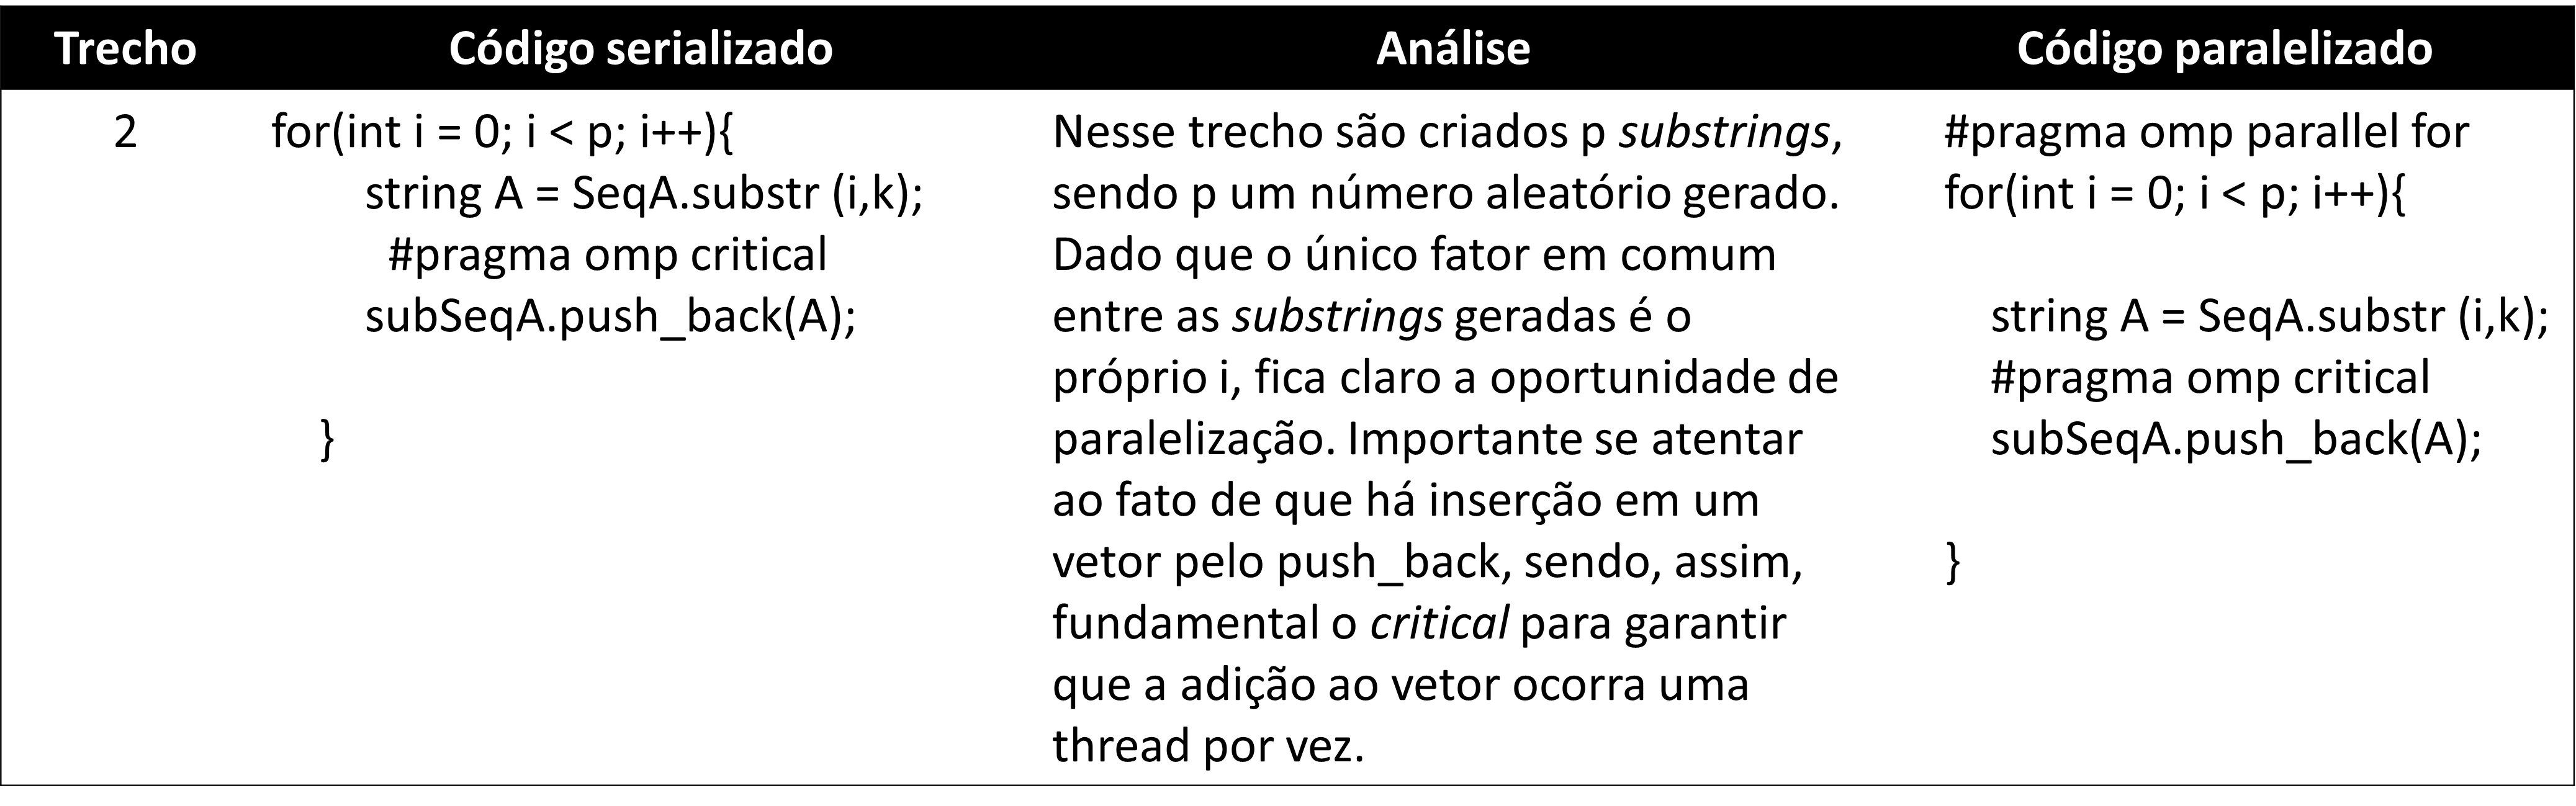

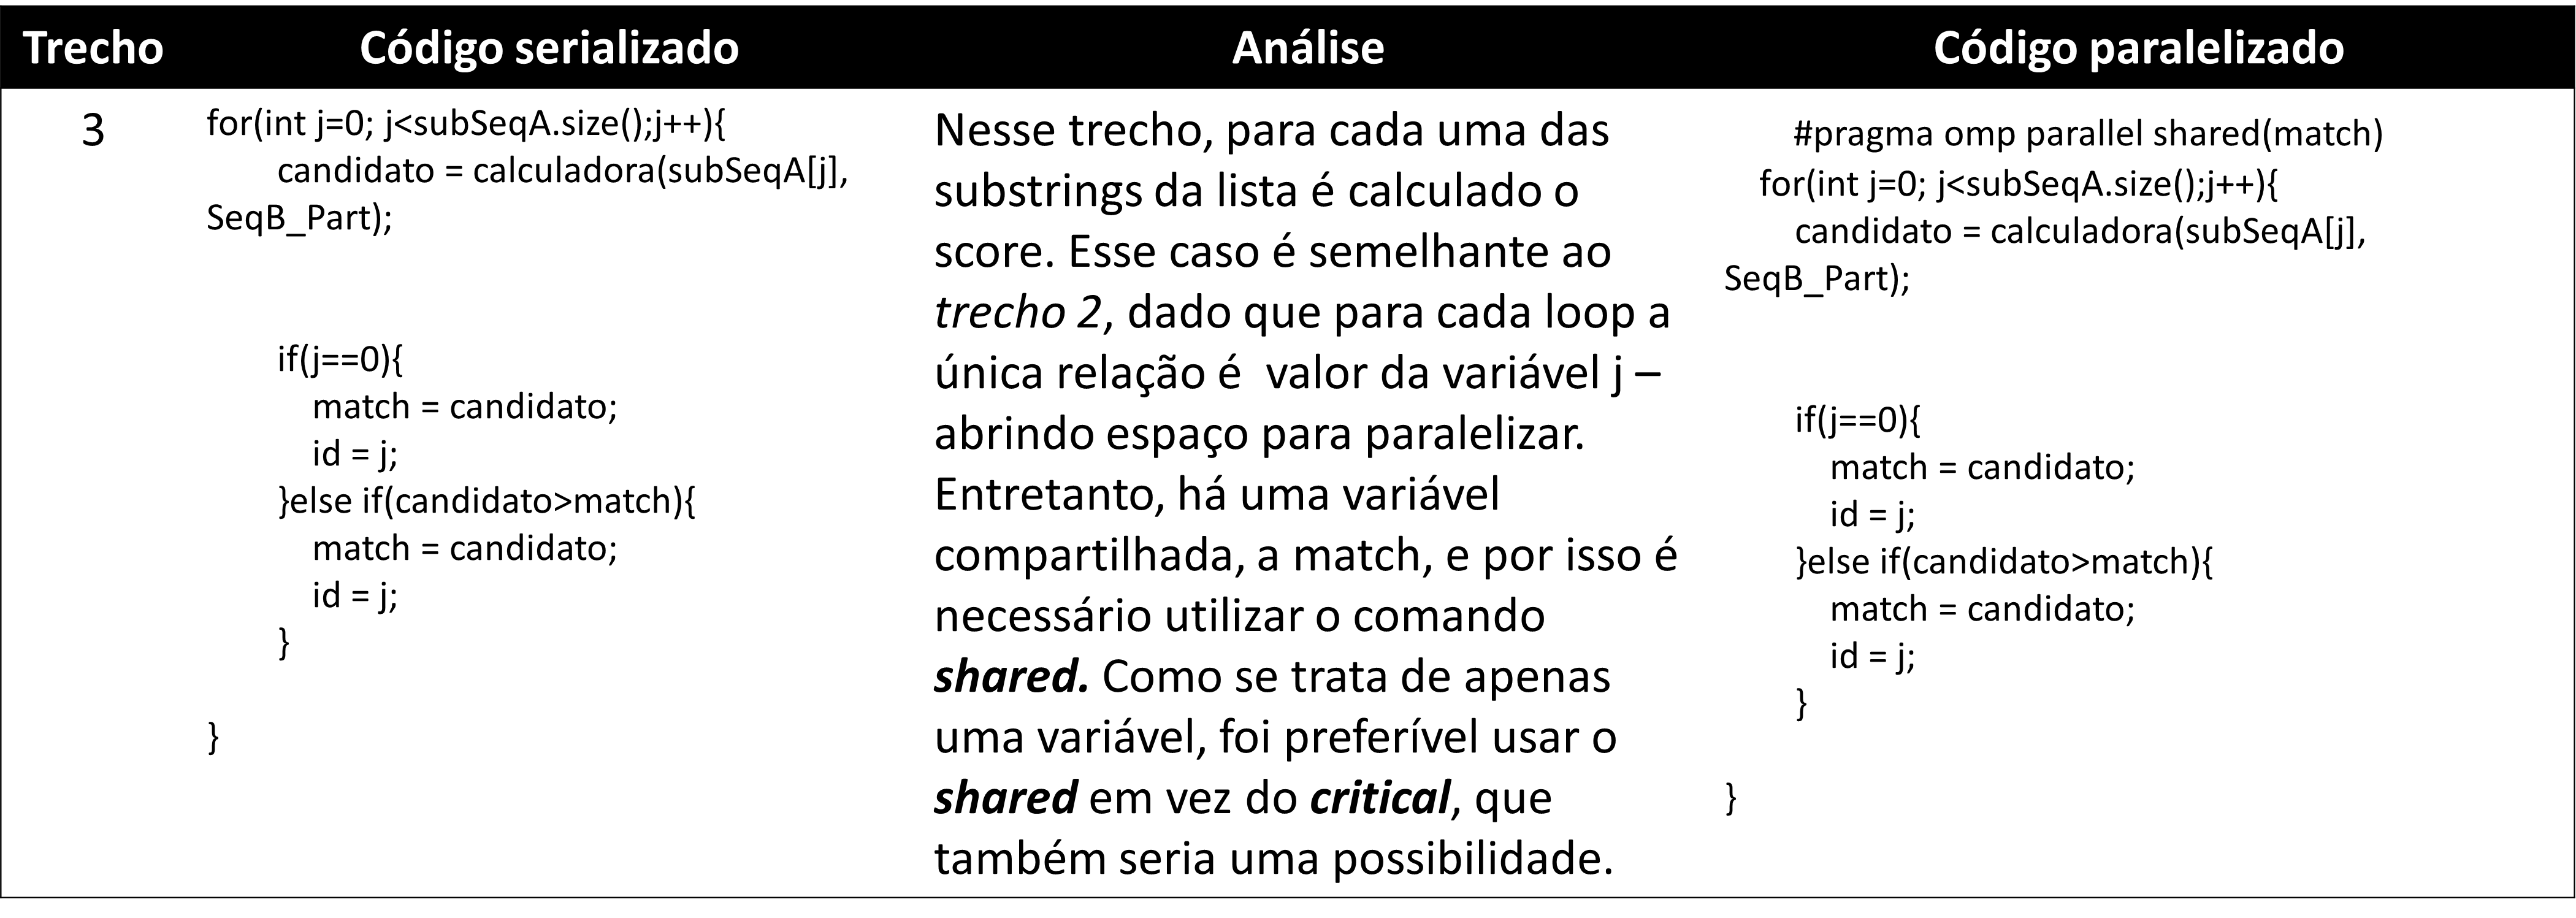


Assim, pelas oportunidades claras de otimização por paralelização, foi escolhido o Algorítmo Local, justamente aquele que melhor performou como evidenciado pelo Relatório Intermediário.

Abaixo, se encontra o código com as modificações exploradas anteriormente.

In [1]:
%%writefile paralelo.cpp 
#include <iostream>
#include<random>
#include<omp.h>
#include <vector>

using namespace std;

int calcula_valor(char a, char b){
    if(a==b){
        return 2;
    }else{
        return -1;
    }
}

string ale_substring(int n, string seq){

    default_random_engine generator(102);
    uniform_real_distribution<double> distribution(1, n);


    int k = distribution(generator); //valor aleatorio para seqB
    string SeqB_Part = seq.substr (0,k);
    return SeqB_Part;

}

int calculadora(string seqA, string seqB){
  int valor = 0;
  int contador = seqA.size();
  
  #pragma omp parallel for reduction(+ : valor)
  for (int i = 0; i < contador; i++){
    valor += calcula_valor(seqA[i], seqB[i]);
  }
  return valor;
}

int main()
{

    int n, m;    
    string SeqA, SeqB;

    cout << "Size Sequence A" << endl;
    cin >> n;
    cout << "Size Sequence B" << endl;
    cin >> m;
    cout << "Sequence A" << endl;
    cin >> SeqA;
    cout << "Sequence B" << endl;
    cin >> SeqB;


    string SeqB_Part = ale_substring(n,SeqB);
    

    cout << "Value of k:" << endl;
    int k = SeqB_Part.size();
    cout <<k<< endl;
    cout << "Substring Sequence B:" << endl;
    cout << SeqB_Part << endl;

    default_random_engine generator(101);
    uniform_real_distribution<double> distribution(1, 5);
    int p = distribution(generator); //numero de subsequencias de seqA
    cout << "Num of substrings SeqA:" << endl;
    cout <<p<< endl;

    vector<string> subSeqA;

    #pragma omp parallel for
    for(int i = 0; i < p; i++){
        
        string A = SeqA.substr (i,k);
        //cout << "Substrings of seqA:"<< endl;
        //cout << A << endl;
        #pragma omp critical
        subSeqA.push_back(A);
        
    }

    int candidato, match, id;
    #pragma omp parallel shared(match)
    for(int j=0; j<subSeqA.size();j++){
        candidato = calculadora(subSeqA[j], SeqB_Part);

        
        if(j==0){
            match = candidato;
            id = j;
        }else if(candidato>match){
            match = candidato;
            id = j;
        }       
        
}

    cout << "Resultados Finais:"<< endl;
    cout << "Match Max:"<< endl;
    cout << match << endl;
    cout << "Substrings que maximizaram o match:"<< endl;
    cout << "Seq A:"<< endl;
    cout << subSeqA[id] << endl;
    cout << "Seq B:"<< endl;
    cout << SeqB_Part << endl;

    cout << ""<< endl;
    cout << "EOF"<< endl;    

    return 0;
}


Writing paralelo.cpp


In [2]:
!g++ -fopenmp -o paralelo paralelo.cpp

Gerando o executável a partir do código **serializado**:

In [3]:
%%writefile serial.cpp 
#include <iostream>
#include<random>

using namespace std;

int calcula_valor(char a, char b){
    if(a==b){
        return 2;
    }else{
        return -1;
    }
}

string ale_substring(int n, string seq){

    default_random_engine generator(102);
    uniform_real_distribution<double> distribution(1, n);


    int k = distribution(generator); //valor aleatorio para seqB
    string SeqB_Part = seq.substr (0,k);
    return SeqB_Part;

}

int calculadora(string seqA, string seqB){
  int valor = 0;
  int contador = seqA.size();
  for (int i = 0; i < contador; i++){
    valor += calcula_valor(seqA[i], seqB[i]);
  }
  return valor;
}

int main()
{

    int n, m;    
    string SeqA, SeqB;

    cout << "Size Sequence A" << endl;
    cin >> n;
    cout << "Size Sequence B" << endl;
    cin >> m;
    cout << "Sequence A" << endl;
    cin >> SeqA;
    cout << "Sequence B" << endl;
    cin >> SeqB;


    string SeqB_Part = ale_substring(n,SeqB);
    

    cout << "Value of k:" << endl;
    int k = SeqB_Part.size();
    cout <<k<< endl;
    cout << "Substring Sequence B:" << endl;
    cout << SeqB_Part << endl;

    default_random_engine generator(101);
    uniform_real_distribution<double> distribution(1, 5);
    int p = distribution(generator); //numero de subsequencias de seqA
    cout << "Num of substrings SeqA:" << endl;
    cout <<p<< endl;

    vector<string> subSeqA;

    for(int i = 0; i < p; i++){
        
        string A = SeqA.substr (i,k);
        //cout << "Substrings of seqA:"<< endl;
        //cout << A << endl;
        subSeqA.push_back(A);
        
    }

    int candidato, match, id;

    for(int j=0; j<subSeqA.size();j++){
        candidato = calculadora(subSeqA[j], SeqB_Part);
        if(j==0){
            match = candidato;
            id = j;
        }else if(candidato>match){
            match = candidato;
            id = j;
        }       
        
}

    cout << "Resultados Finais:"<< endl;
    cout << "Match Max:"<< endl;
    cout << match << endl;
    cout << "Substrings que maximizaram o match:"<< endl;
    cout << "Seq A:"<< endl;
    cout << subSeqA[id] << endl;
    cout << "Seq B:"<< endl;
    cout << SeqB_Part << endl;

    cout << ""<< endl;
    cout << "EOF"<< endl;    

    return 0;
}


Writing serial.cpp


In [4]:
!g++ -O3 serial.cpp -o serial

### **Comparação de tempo**

Gerando entradas de tamanho 50000 a 100000

In [ ]:
import shutil
shutil.rmtree('entries')

FileNotFoundError: ignored

In [6]:
import random
max = 100001
def Seq_Gen(n):
    file = 'entries/dna.seq' + str(n)
    f = open(file, 'w')
    seq=[str(n)+'\n',
     str(n)+'\n',
     ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
     ''.join(random.choices(['A','T','C','G','-'],k=n))]
    f.writelines(seq)
    f.close()

i = 50000
while i <max:
  Seq_Gen(i)
  i+=100

In [7]:
# Criando uma lista com entradas ordenadas e seus respectivos tamanhos

import subprocess
import time
import os
import matplotlib.pyplot as plt 
directory = 'entries'
entries = []
size_entries = []
i = 50000

while i < max:

  for filename in os.listdir(directory):

    if filename == "dna.seq" + str(i):
      f = os.path.join(directory, filename)
      # checking if it is a file
      if os.path.isfile(f):
        entries.append(f)
  i+=50

i = 50000     
while i < max:
  size_entries.append(i)
  i+=100

In [8]:
# Funções para multiplas execuções (em for)

def roda_com_entrada(executavel, arquivo_in):
    with open(arquivo_in) as f:
        start = time.perf_counter()
        proc = subprocess.run(['./' + executavel], input=f.read(), text=True, capture_output=True)
        print(arquivo_in)
        end = time.perf_counter()        
        time1 = end - start  
        print(time1)     
    
    return (time1)

def multiplas_rodagens(executavel, lista_entradas):
    tempos = []
    for i in lista_entradas:
        tempo = roda_com_entrada(executavel,i)
        tempos.append(tempo)
    return tempos


In [9]:
tempos_serial = []
tempos_paralelo = []

tempos_paralelo = multiplas_rodagens("paralelo", entries)

entries/dna.seq50000
0.021144114999998465
entries/dna.seq50100
0.011790114999996604
entries/dna.seq50200
0.011327931000010949
entries/dna.seq50300
0.012538679999977376
entries/dna.seq50400
0.012805373999981384
entries/dna.seq50500
0.011839586000007785
entries/dna.seq50600
0.011254402000020036
entries/dna.seq50700
0.010990251999999145
entries/dna.seq50800
0.012116591999983939
entries/dna.seq50900
0.014727314999987584
entries/dna.seq51000
0.012478162000007842
entries/dna.seq51100
0.011162844000011773
entries/dna.seq51200
0.01979030399999715
entries/dna.seq51300
0.014484503000005589
entries/dna.seq51400
0.013095402000004697
entries/dna.seq51500
0.017321768999977394
entries/dna.seq51600
0.01300798799999825
entries/dna.seq51700
0.014782195000009324
entries/dna.seq51800
0.015347802999997384
entries/dna.seq51900
0.012125883000010163
entries/dna.seq52000
0.012894737999999961
entries/dna.seq52100
0.012009036999984346
entries/dna.seq52200
0.01351428800001031
entries/dna.seq52300
0.01189107199999

In [10]:
tempos_serial = multiplas_rodagens("serial", entries)

entries/dna.seq50000
0.01783254699998338
entries/dna.seq50100
0.012579858999998805
entries/dna.seq50200
0.011645607999980712
entries/dna.seq50300
0.011463340999995353
entries/dna.seq50400
0.012451149000014539
entries/dna.seq50500
0.010618963999974085
entries/dna.seq50600
0.010699225999985629
entries/dna.seq50700
0.01056513899999345
entries/dna.seq50800
0.01082176700001014
entries/dna.seq50900
0.012068591000002016
entries/dna.seq51000
0.012521788999976025
entries/dna.seq51100
0.010653336000018498
entries/dna.seq51200
0.011871310999993057
entries/dna.seq51300
0.01063306300000022
entries/dna.seq51400
0.010862362000011672
entries/dna.seq51500
0.013175270999994382
entries/dna.seq51600
0.011993757999988475
entries/dna.seq51700
0.013211685000015905
entries/dna.seq51800
0.012730840999978454
entries/dna.seq51900
0.011447202999988804
entries/dna.seq52000
0.011711648999977342
entries/dna.seq52100
0.010599776999981714
entries/dna.seq52200
0.014501572000000351
entries/dna.seq52300
0.012292262999977

In [11]:
print(len(size_entries), len(tempos_serial))

501 501


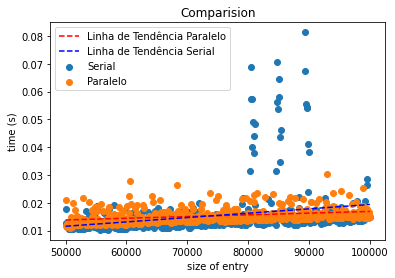

In [12]:
plt.scatter(size_entries, tempos_serial,  label = "Serial")
plt.scatter(size_entries, tempos_paralelo, label = "Paralelo")

import numpy as np

z = np.polyfit(size_entries, tempos_paralelo, 1)
p = np.poly1d(z)
plt.plot(size_entries,p(size_entries),"r--", label = "Linha de Tendência Paralelo")

z = np.polyfit(size_entries, tempos_serial, 1)
p = np.poly1d(z)
plt.plot(size_entries,p(size_entries),"b--", label = "Linha de Tendência Serial")

plt.ylabel('time (s)')
plt.xlabel('size of entry')
 

plt.legend()
plt.title('Comparision')
plt.show()

**Como é evidenciado no gráfico a cima, o paralelo apresenta ganho de otimização a partir das entradas maiores, no caso, superiores a 80 mil**

In [13]:
print("EOF")

EOF
